Model with outliers non normalized for short-term bonds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
all_data = pd.read_csv("./OFZ Data - Dataset.csv")
display(all_data)

,Index,Название,Начало Торгов,Погашение,Купон,Периодичность,ISIN,start,end,Price,days_to_maturity,moex_ytm,years_to_maturity,Date,Rate,Inflation,Observed Inflation,Expected inflation 1y
0,5,26208,07.03.2012,27.02.2019,7.5,2,SU26208RMFS7,2012-03-07,2019-02-27,101.11525,422,6.6351,1.156164,2018-01-01,7.75,2.50,10.0,8.7
1,12,26216,13.11.2013,15.05.2019,6.7,2,SU26216RMFS0,2013-11-13,2019-05-15,100.04750,499,6.8103,1.367123,2018-01-01,7.75,2.50,10.0,8.7
2,7,26210,19.12.2012,11.12.2019,6.8,2,SU26210RMFS3,2012-12-19,2019-12-11,100.11450,709,6.8798,1.942466,2018-01-01,7.75,2.50,10.0,8.7
3,10,26214,23.10.2013,27.05.2020,6.4,2,SU26214RMFS5,2013-10-23,2020-05-27,99.06450,877,6.9665,2.402740,2018-01-01,7.75,2.50,10.0,8.7
4,3,26205,13.02.2012,14.04.2021,7.6,2,SU26205RMFS3,2012-02-13,2021-04-14,102.45550,1199,6.8859,3.284932,2018-01-01,7.75,2.50,10.0,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,17,26233,13.05.2020,18.07.2035,6.1,2,SU26233RMFS5,2020-05-13,2035-07-18,65.74400,4247,11.8467,11.635616,2023-12-01,15.00,7.48,15.1,12.2
1539,24,26240,30.06.2021,30.07.2036,7.0,2,SU26240RMFS0,2021-06-30,2036-07-30,70.24550,4625,11.8485,12.671233,2023-12-01,15.00,7.48,15.1,12.2
1540,27,26243,21.06.2023,19.05.2038,9.8,2,SU26243RMFS4,2023-06-21,2038-05-19,87.85850,5283,11.8803,14.473973,2023-12-01,15.00,7.48,15.1,12.2
1541,14,26230,19.06.2019,16.03.2039,7.7,2,SU26230RMFS1,2019-06-19,2039-03-16,72.62575,5584,11.8831,15.298630,2023-12-01,15.00,7.48,15.1,12.2


In [3]:
data = all_data[["years_to_maturity", "Rate", "Inflation", "Observed Inflation", "Expected inflation 1y", "moex_ytm"]]
data = data.apply(pd.to_numeric)
data = data[data["years_to_maturity"] < 3]
display(data)

,years_to_maturity,Rate,Inflation,Observed Inflation,Expected inflation 1y,moex_ytm
0,1.156164,7.75,2.50,10.0,8.7,6.6351
1,1.367123,7.75,2.50,10.0,8.7,6.8103
2,1.942466,7.75,2.50,10.0,8.7,6.8798
3,2.402740,7.75,2.50,10.0,8.7,6.9665
17,1.071233,7.75,2.20,9.9,8.9,6.6960
...,...,...,...,...,...,...
1518,0.876712,15.00,7.48,15.1,12.2,12.0852
1519,1.624658,15.00,7.48,15.1,12.2,12.2334
1520,1.950685,15.00,7.48,15.1,12.2,11.9419
1521,2.794521,15.00,7.48,15.1,12.2,11.5131


In [4]:
data.describe()

,years_to_maturity,Rate,Inflation,Observed Inflation,Expected inflation 1y,moex_ytm
count,360.000000,360.000000,360.000000,360.0000,360.000000,360.000000
mean,1.748836,7.618056,6.417167,13.2875,10.771667,7.403592
std,0.726263,2.840028,4.177168,4.0002,1.954518,1.972199
min,0.517808,4.250000,2.200000,8.3000,7.800000,4.025300
25%,1.120548,6.437500,3.500000,10.0000,9.300000,6.142350
50%,1.741095,7.500000,5.150000,12.7500,10.400000,7.265800
75%,2.371233,7.750000,8.130000,16.2000,12.100000,8.194125
max,2.997260,20.000000,17.830000,25.1000,18.300000,14.260200


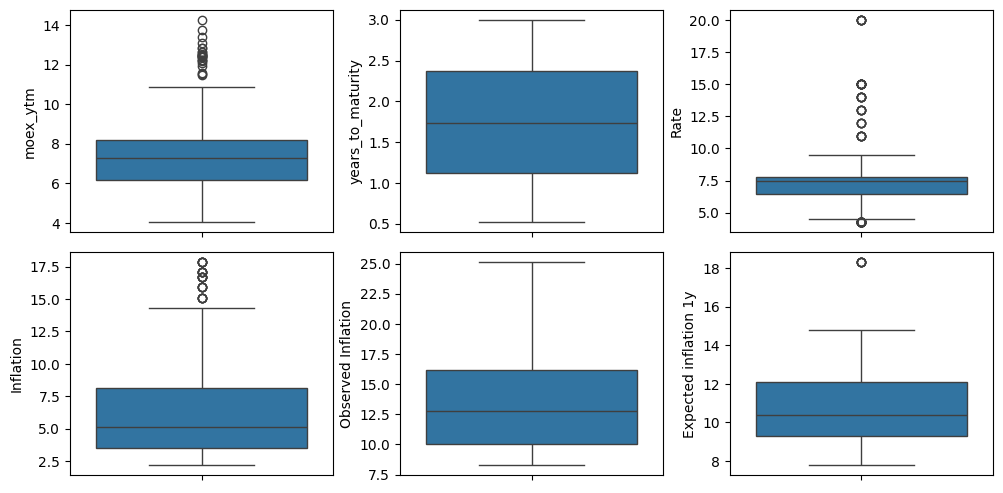

In [5]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['moex_ytm'], ax = axs[0,0])
plt2 = sns.boxplot(data['years_to_maturity'], ax = axs[0,1])
plt3 = sns.boxplot(data['Rate'], ax = axs[0,2])
plt1 = sns.boxplot(data['Inflation'], ax = axs[1,0])
plt2 = sns.boxplot(data['Observed Inflation'], ax = axs[1,1])
plt3 = sns.boxplot(data['Expected inflation 1y'], ax = axs[1,2])

plt.tight_layout()

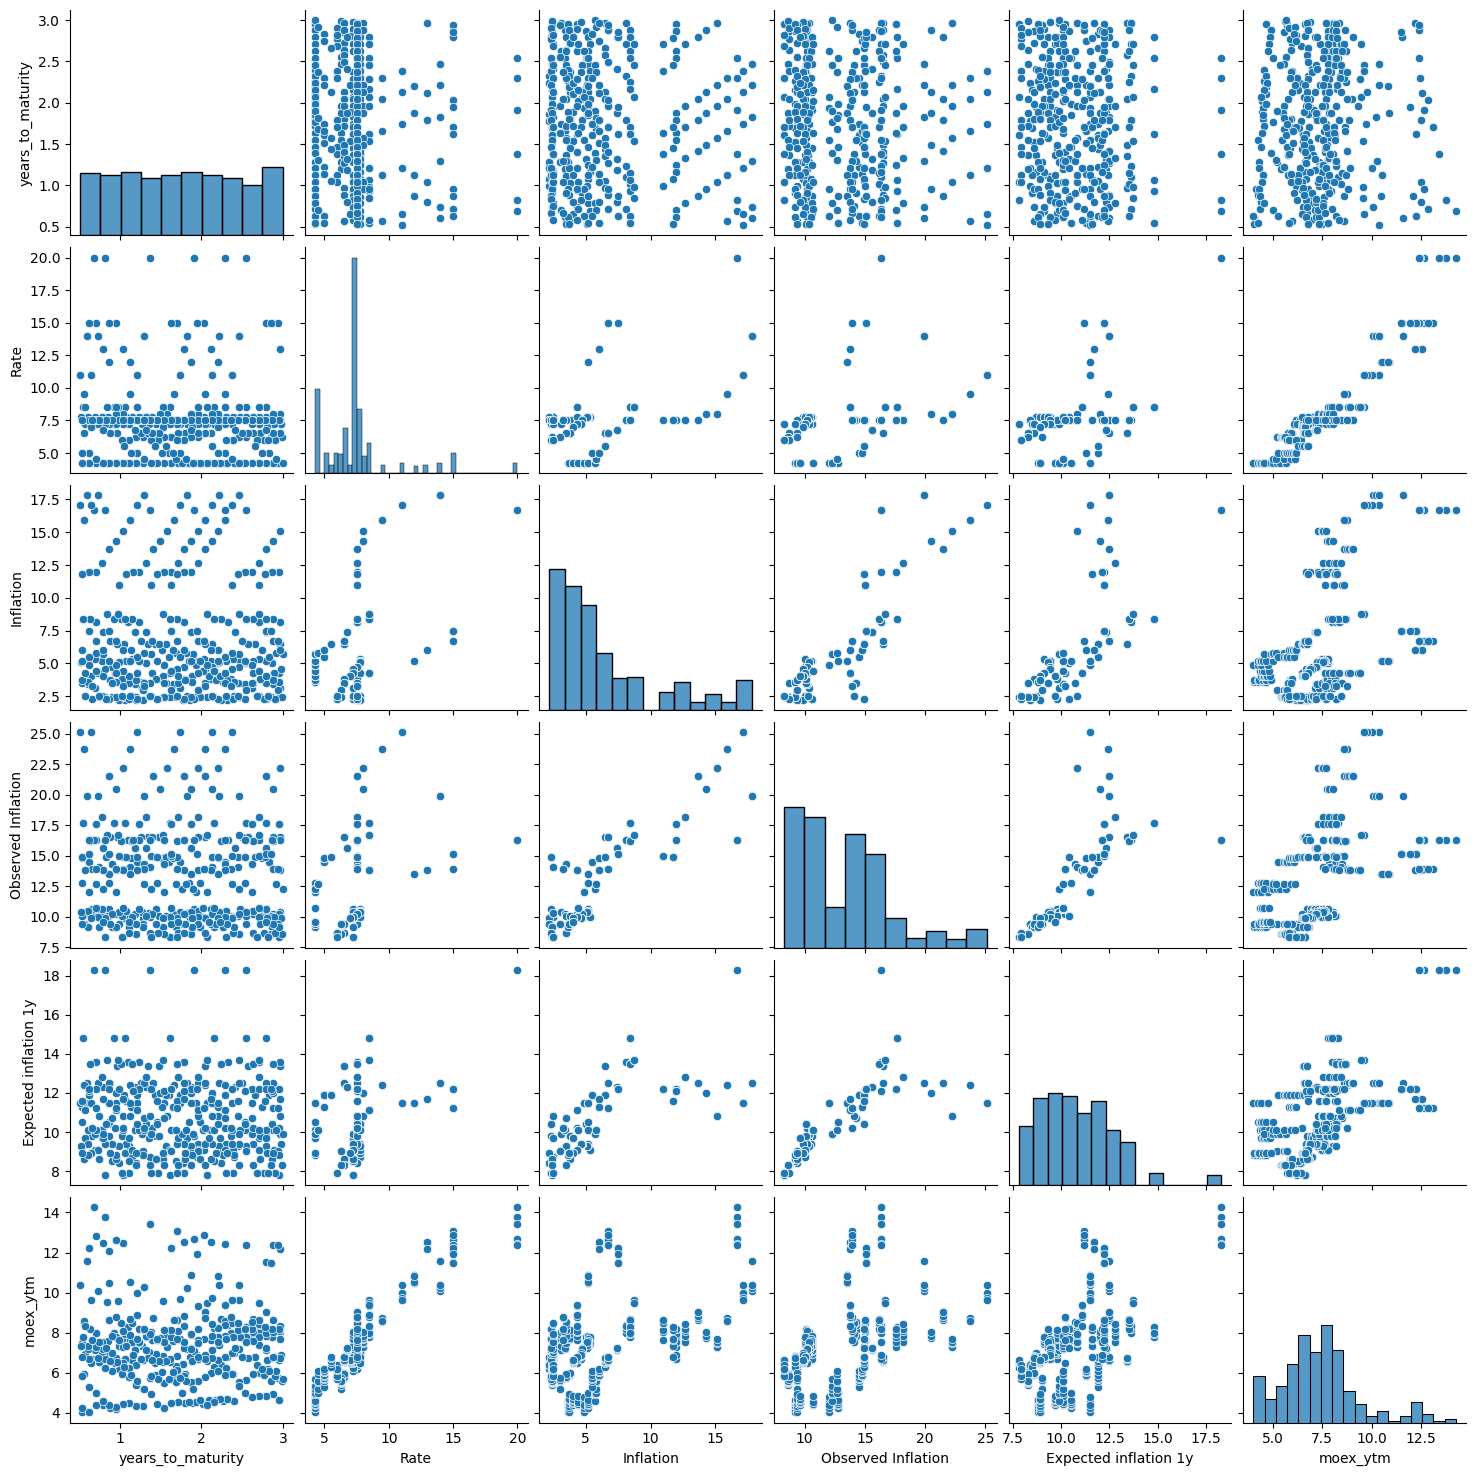

In [6]:
sns.pairplot(data)

In [7]:
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

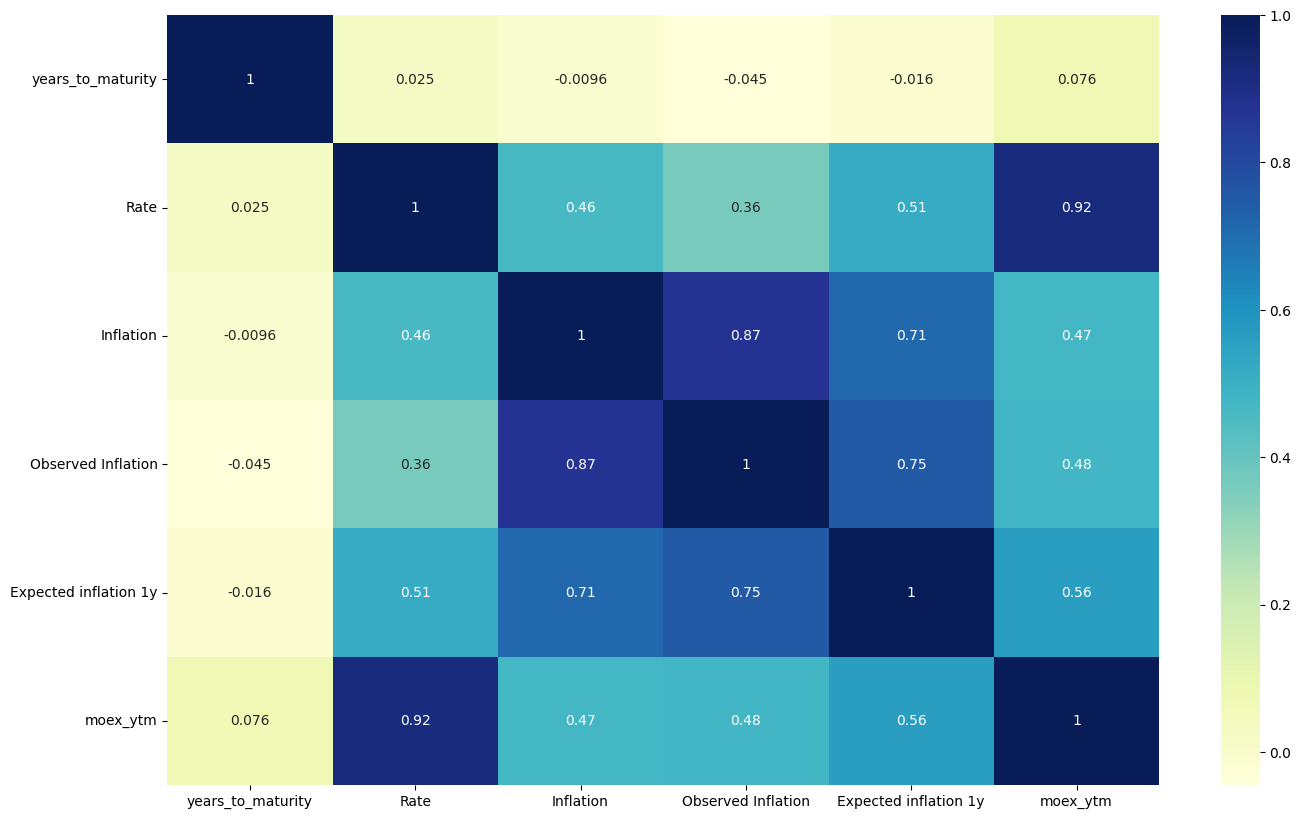

In [8]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [9]:
y_train = df_train.pop('moex_ytm')
X_train = df_train

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [12]:
rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [13]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('years_to_maturity', True, 1),
 ('Rate', True, 1),
 ('Inflation', False, 3),
 ('Observed Inflation', False, 2),
 ('Expected inflation 1y', False, 4)]

In [14]:
col = X_train.columns[rfe.support_]
col

Index(['years_to_maturity', 'Rate'], dtype='object')

In [15]:
X_train.columns[~rfe.support_]

Index(['Inflation', 'Observed Inflation', 'Expected inflation 1y'], dtype='object')

In [16]:
X_train_rfe = X_train[col]

In [17]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [18]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [19]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               moex_ytm   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     691.0
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          3.97e-102
Time:                        13:14:37   Log-Likelihood:                -287.42
No. Observations:                 251   AIC:                             580.8
Df Residuals:                     248   BIC:                             591.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.3154      0.18

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.99
1,years_to_maturity,1.00
2,Rate,1.00


In [22]:
y_train_price = lm.predict(X_train_rfe)

In [23]:
res = (y_train_price - y_train)

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

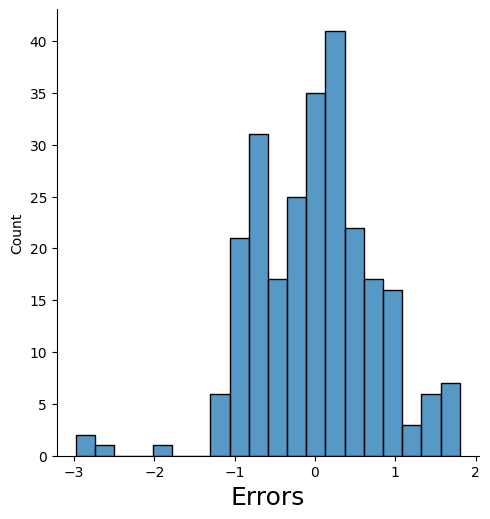

In [24]:
%matplotlib inline
fig = plt.figure()
sns.displot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)   

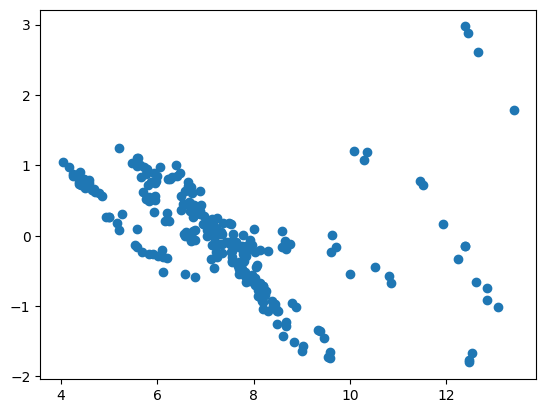

In [25]:
plt.scatter(y_train,res)
plt.show()

In [26]:
y_test = df_test.pop('moex_ytm')
X_test = df_test
X_test = sm.add_constant(X_test)
X_test_rfe = X_test[X_train_rfe.columns]

In [27]:
y_pred = lm.predict(X_test_rfe)

In [28]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8697709864404282

Text(0, 0.5, 'y_pred')

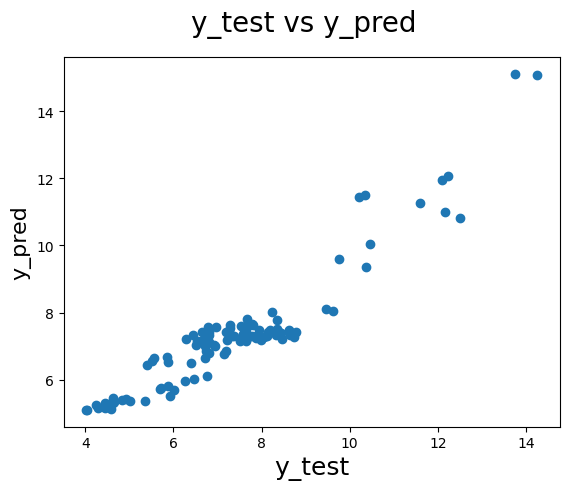

In [29]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 